### Estimating Uncertainty in Solubility

This notebook estimates the uncertainty in the solubility of CO2 in VORANOL 360 polyol.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# USER PARAMETERS

# PERMISSIBLE UNCERTAINTIES
# uncertainty in volume of polyol [mL]
sigma_V_poly = 2
# uncertainty in initial mass of dry ice [g]
sigma_m0 = 0.1

# VARIABLES
# volume of polyol [mL]
V_poly = 150 #np.arange(10,200,10)

# sigma_V_poly = np.sqrt(2*V_poly/30)

#################################################################
# FIXED UNCERTAINTY
# uncertainty in temperature [C]
sigma_T = 1
# uncertainty in span pressure gauge [Pa]
sigma_p_span_pa = 5E4
# uncertainty in conversion of span gauge to actual pressure
sigma_p_conv = 0
# conversion from span gauge to actual pressure
conv = 1
# uncertainty in volume of Parr reactor [mL] 
sigma_V_tot = 2

# CONSTANTS
# universal gas constant (J/mol.K)
R = 8.314
# pascals per psi
psi2pa = 6894.75
# pa per bar
bar2pa = 1E5
# m^3 per mL
mL2m3 = 1E-6
# molar mass of carbon dioxide [g/mol]
mw_co2 = 44
# density of VORANOL 360 [g/mL]
rho_poly = 1.08
# volume of Parr reactor [mL]
V_tot = 233

Load data from Dow for solubility of CO2 in VORANOL 360 polyol at 25 C

In [29]:
# copy-paste data from file "co2_solubility_pressures.xlsx"
data = np.array([[198.1, 0.0372],
        [405.6, 0.0821],
        [606.1, 0.1351],
        [806.8, 0.1993],
        [893.9, 0.2336]])
# temperature [K]
T = 298

# first column is pressure in psia
p_psia = data[1,0]
# second column is solubility in fraction w/w
solubility = data[1,1]

Convert data into quantities required to calculate the uncertainty.

In [30]:
# convert pressure to Pa
p_pa = psi2pa * p_psia

# uncertainty in pressure
sigma_p_pa = np.sqrt(sigma_p_span_pa**2 + (sigma_p_conv/conv*p_pa)**2)

# compute volume of gas phase in m^3
V_gas = V_tot - V_poly
sigma_V_gas = np.sqrt((sigma_V_tot)**2 + (sigma_V_poly)**2)
V_gas_m3 = mL2m3 * V_gas
sigma_V_gas_m3 = mL2m3 * sigma_V_gas

# number of moles in gas phase
n_co2_gas = p_pa*V_gas_m3/(R*T)
# mass of co2 in the gas phase [g]
m_co2_gas = mw_co2 * n_co2_gas

# compute mass of co2 in solution [g]
m_poly = rho_poly * V_poly
m_co2_soln = solubility * m_poly

# uncertainty of mass of co2 in solution
sigma_n_co2_gas = np.sqrt((sigma_p_pa/p_pa)**2 + (sigma_V_gas/V_gas)**2 + (sigma_T/T)**2)*n_co2_gas   
sigma_m_co2_gas = sigma_n_co2_gas/n_co2_gas*m_co2_gas
sigma_m_co2_soln = np.sqrt(sigma_m0**2 + sigma_m_co2_gas**2)

# uncertainty in mass of polyol
sigma_m_poly = (sigma_V_poly/V_poly)*m_poly

Compute uncertainty.

In [31]:
sigma_sol_frac = np.sqrt((sigma_m_co2_soln / m_co2_soln)**2 + (sigma_m_poly / m_poly)**2)

print(sigma_sol_frac)

0.01943306701671106


Plot

Text(0,0.5,'Fractional Uncertainty in Solubility')

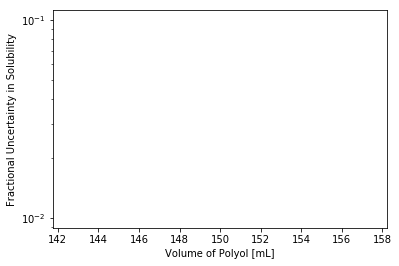

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.semilogy(V_poly, sigma_sol_frac)
ax.set_xlabel('Volume of Polyol [mL]')
ax.set_ylabel('Fractional Uncertainty in Solubility')

In [33]:
R = 1.6875
H = 4
np.pi*R**2/(2*np.pi*R*H + 2*np.pi*R**2)

0.14835164835164835

In [34]:
2.43*160

388.8